# Import everything

In [42]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
# from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import tqdm
import math

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
# from oct2py import octave
from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from timeit import default_timer as timer
from datetime import timedelta
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from spectrum import arburg, arma2psd, pburg
import pylab
from scipy.signal import find_peaks, butter
from scipy.integrate import simps
from scipy.io import loadmat
from numpy import trapz

In [199]:
raw_powers = sorted(glob.glob('../tmseeg-matlab/dataset3/raw/*-powers.csv'))[0:-1]
raw_hjorth_powers = sorted(glob.glob('../tmseeg-matlab/dataset3/raw-hjorth/*-powers.csv'))
clean_powers = sorted(glob.glob('../tmseeg-matlab/dataset3/clean/*-powers.csv'))
clean_hjorth_powers = sorted(glob.glob('../tmseeg-matlab/dataset3/clean-hjorth/*-powers.csv'))

In [200]:
print("Raw: {}\nRaw Hjorth: {}\nClean: {}\nClean Hjorth: {}".format(len(raw_powers), len(raw_hjorth_powers), len(clean_powers), len(clean_hjorth_powers)))

Raw: 9
Raw Hjorth: 9
Clean: 9
Clean Hjorth: 9


In [214]:
df_powers = []
for artifactRemoved, eegType, files in tqdm(zip([False, False, True, True], ['Raw', 'Hjorth', 'Raw', 'Hjorth'], [raw_powers, raw_hjorth_powers, clean_powers, clean_hjorth_powers]), total=4):
    for csv_path in files:
        df2 = pd.read_csv(csv_path)
        df2.columns = df2.iloc[0]
        df2 = df2.iloc[1:-1]
        for idx, row in df2.iterrows():
            for band in ['theta', 'mu', 'beta', 'gamma']:
                df_powers.append({
                    'Subject': csv_path.split('/')[-1].split('-')[0].split('_')[-1],
                    'ArtifactRemoved': artifactRemoved,
                    'EEG': eegType,
                    'Band': band,
                    'Power': float(row[band]),
                    'trial': idx+1
                })
df_powers = pd.DataFrame(df_powers)

In [215]:
df2 = df_powers[df_powers['EEG'] == 'Raw']
df2.shape

(36424, 6)

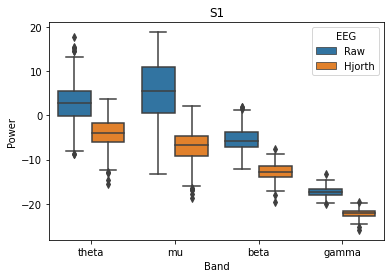

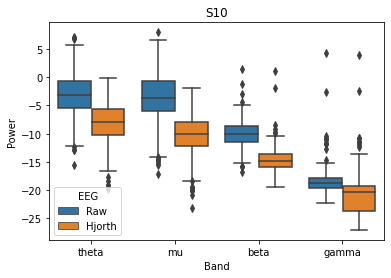

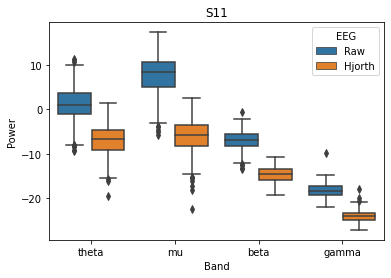

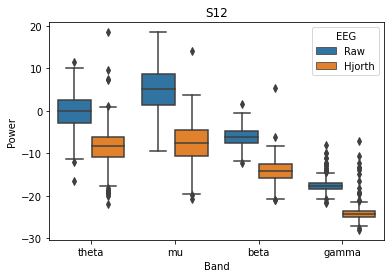

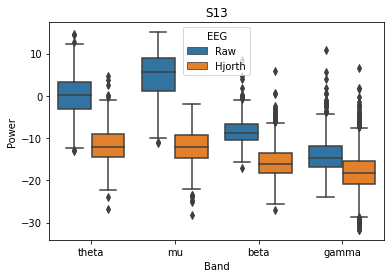

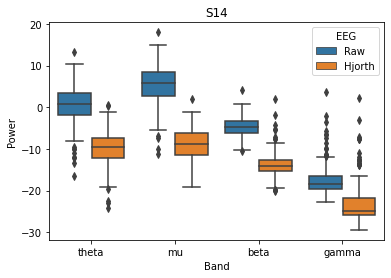

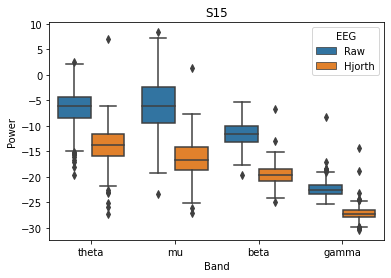

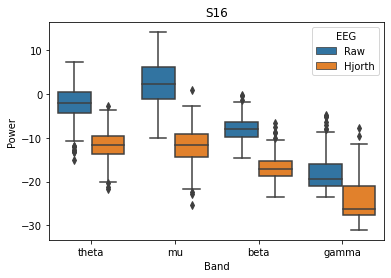

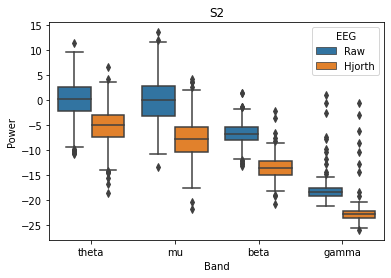

In [222]:
df2 = df_powers[df_powers['ArtifactRemoved'] == False]
subs = df2['Subject'].unique()
for sub in subs:
    df3 = df2[df2['Subject'] == sub]
    sns.boxplot(x='Band', y='Power', hue='EEG', data=df3[['Band', 'Power', 'EEG']])
    plt.title(sub)
    plt.show()